# Setup packages and Drive

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow import keras

from keras.callbacks import EarlyStopping
from keras.models import Model
from keras.layers import Input,Dense,Dropout,concatenate
from keras.metrics import BinaryAccuracy, MeanSquaredError
from keras.losses import BinaryCrossentropy, MeanSquaredError

from datetime import datetime

import seaborn as sns

from scipy.optimize import curve_fit

# !pip install tensorflow tensorflow_decision_forests
# import tensorflow_decision_forests as tfdf

!pip install keras-tuner -q
import keras_tuner

In [4]:
# resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# print("All devices: ", tf.config.list_logical_devices())
# tpu_strategy = tf.distribute.TPUStrategy(resolver)
# tpu_strategy.num_replicas_in_sync

In [5]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
path = '/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/'

# Reading and cleaning data

In [7]:
df_tot = pd.read_csv(path+'dielectron.csv')
df_tot.rename(columns={"px1 ": "px1"}, inplace=True)
colname = df_tot.columns.values.tolist()

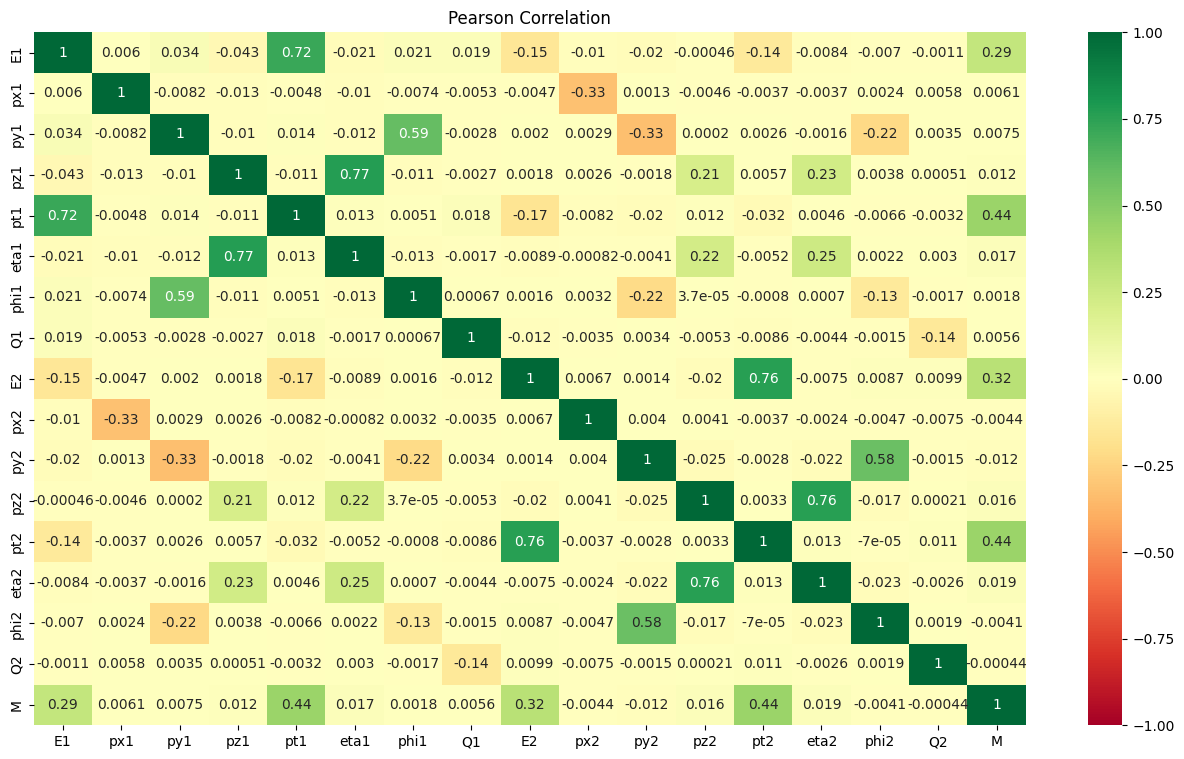

In [8]:
corr_pearson = df_tot[colname[2:]].corr(method='pearson')

fig = plt.figure(figsize = (16,9))
sns.heatmap(corr_pearson, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Pearson Correlation')
plt.show()

In [9]:
colname

['Run',
 'Event',
 'E1',
 'px1',
 'py1',
 'pz1',
 'pt1',
 'eta1',
 'phi1',
 'Q1',
 'E2',
 'px2',
 'py2',
 'pz2',
 'pt2',
 'eta2',
 'phi2',
 'Q2',
 'M']

In [10]:
df_tot['Event'].value_counts()

439950319    3
440012942    3
542369397    2
541746848    2
407103633    2
            ..
533929729    1
533477001    1
533722800    1
533379552    1
524172389    1
Name: Event, Length: 99976, dtype: int64

In [11]:
dup_ev = df_tot["Event"].value_counts()[df_tot["Event"].value_counts() > 1].index.tolist()
df_tot[df_tot['Event'].isin(dup_ev)].sort_values(by='Event')

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
97032,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
96984,146511,337473110,15.71730,2.243060,-2.982110,15.26790,3.73153,2.116690,-0.925907,1,56.61260,-19.624500,5.329360,-52.83430,20.33530,-1.683080,2.876420,1,59.26850
97033,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96985,146511,337653458,17.69410,-4.451330,16.592600,-4.23684,17.17930,-0.244190,1.832900,-1,2.52616,-0.339374,-2.212630,1.17071,2.23851,0.501678,-1.722990,-1,13.02770
96986,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97034,146511,337851094,3.85730,1.011940,-3.335790,1.65144,3.48590,0.457610,-1.276260,1,38.52790,-20.602700,-3.118160,32.40680,20.83730,1.225010,-2.991390,1,14.52880
97035,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
96987,146511,338078762,18.47870,5.565370,11.268000,13.54700,12.56740,0.935430,1.112030,-1,11.90390,4.304320,-1.136620,-11.04010,4.45186,-1.639740,-0.258172,-1,26.77250
97015,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660
96988,146511,406690266,12.43280,-2.900320,1.974970,11.92740,3.50890,1.937650,2.543770,-1,128.67400,21.211400,-11.920200,126.35300,24.33130,2.349610,-0.511986,1,18.85660


In [12]:
df_tot.loc[79612, "Event"] = 418006835
dup_ev.remove(418006834)
df_tot = df_tot.drop_duplicates(subset="Event")
df_tot.duplicated().sum()

0

In [13]:
df_tot = df_tot.dropna(subset=["M"])
print("Number of missing values after dropping rows: ", df_tot.isnull().sum().sum())
df_tot

Number of missing values after dropping rows:  0


,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2,M
0,147115,366639895,58.71410,-7.311320,10.531000,-57.29740,12.82020,-2.202670,2.177660,1,11.28360,-1.032340,-1.88066,-11.077800,2.14537,-2.344030,-2.072810,-1,8.94841
1,147115,366704169,6.61188,-4.152130,-0.579855,-5.11278,4.19242,-1.028420,-3.002840,-1,17.14920,-11.713500,5.04474,11.464700,12.75360,0.808077,2.734920,1,15.89300
2,147115,367112316,25.54190,-11.480900,2.041680,22.72460,11.66100,1.420480,2.965600,1,15.82030,-1.472800,2.25895,-15.588800,2.69667,-2.455080,2.148570,1,38.38770
3,147115,366952149,65.39590,7.512140,11.887100,63.86620,14.06190,2.218380,1.007210,1,25.12730,4.087860,2.59641,24.656300,4.84272,2.330210,0.565865,-1,3.72862
4,147115,366523212,61.45040,2.952840,-14.622700,-59.61210,14.91790,-2.093750,-1.371540,-1,13.88710,-0.277757,-2.42560,-13.670800,2.44145,-2.423700,-1.684810,-1,2.74718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,146511,522575834,12.31310,-10.658000,5.164440,3.36858,11.84330,0.280727,2.690370,-1,1.80181,0.668609,-1.58437,0.537805,1.71967,0.307851,-1.171470,1,8.44779
99996,146511,522786431,18.46420,7.854990,15.133000,-7.08659,17.05020,-0.404510,1.092010,1,14.69110,-1.418020,-2.28117,-14.443500,2.68598,-2.383880,-2.126960,1,20.71540
99997,146511,522906124,4.18566,-3.273500,-0.308507,-2.59013,3.28801,-0.723075,-3.047630,1,72.81740,-11.074900,-9.28179,-71.369300,14.45010,-2.300410,-2.444050,-1,12.71350
99998,146511,523243830,54.46220,11.352600,11.880900,51.92400,16.43280,1.867800,0.808132,-1,8.58671,0.378009,3.07828,8.007050,3.10141,1.677170,1.448610,1,4.69670


In [14]:
df_m = df_tot['M']
df_tot = df_tot.drop(columns=['M'])
df_train,df_test,m_train,m_test = train_test_split(df_tot,df_m,train_size=0.6,random_state=10)
df_train = pd.DataFrame(df_train,columns=colname[:-1])
df_test = pd.DataFrame(df_test,columns=colname[:-1])
df_train.describe()
print()
df_test

,Run,Event,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
18977,149181,832616392,45.34230,15.854400,9.404870,-41.426000,18.43400,-1.549040,0.535407,1,13.49950,0.906079,-2.241030,-13.28130,2.41727,-2.405050,-1.186580,-1
39965,147114,68262110,26.94790,-4.667210,11.272300,24.027900,12.20030,1.429890,1.963350,-1,13.39050,1.453900,1.699650,13.20240,2.23666,2.475660,0.863169,-1
77585,148029,158698597,14.07070,9.796140,8.899020,-4.777970,13.23470,-0.353604,0.737448,1,3.82626,1.071210,-3.213900,-1.77865,3.38772,-0.503484,-1.249070,-1
14979,146644,862576595,2.52908,-1.938620,-0.486651,-1.549570,1.99877,-0.713234,-2.895650,1,95.82000,11.370900,15.505300,-93.87100,19.22790,-2.289040,0.938031,-1
69746,147929,274236558,60.34890,24.300200,36.928500,41.082500,44.20650,0.830511,0.988794,-1,72.26650,-18.500300,-39.962100,57.29940,44.03670,1.079170,-2.004360,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75193,148029,378539738,104.91600,-13.024300,16.579700,-102.775000,21.08360,-2.287560,2.236670,1,12.08680,-0.709278,3.138760,-11.65060,3.21791,-1.998320,1.793040,-1
5436,147115,148168376,3.01485,-0.816853,2.741250,-0.952686,2.86036,-0.327195,1.860400,1,70.11000,-12.965900,7.242380,-68.51890,14.85150,-2.233700,2.632190,1
91291,146944,648565910,68.74660,11.962300,12.973300,-66.443100,17.64660,-2.036130,0.825917,1,4.09300,3.735870,-0.939378,1.38328,3.85217,0.351791,-0.246341,1
29797,149181,1479501787,102.89400,19.258300,15.707200,-99.848200,24.85150,-2.099020,0.684184,-1,49.08070,-8.725040,-3.544050,-48.16880,9.41736,-2.334730,-2.755760,-1


In [15]:
df_run = df_train['Run']
df_event = df_train['Event']
df_train = df_train.drop(columns=['Run','Event'])

scaling = True

if scaling:
  scaler = MinMaxScaler((0,100))
  df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train),columns=colname[2:18])
else:
  df_train_scaled = df_train
df_train.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000
mean,36.487806,0.145912,0.155396,-1.641861,14.420947,-0.069616,0.018465,-0.005489,43.769226,-0.027146,0.138699,-1.651284,13.724959,-0.079243,0.028034,-0.002386
std,41.116059,13.392492,13.477405,51.557463,12.372451,1.463286,1.798800,0.999993,46.524425,13.040834,13.073769,61.127454,12.354317,1.740088,1.819092,1.000005
min,0.377928,-152.969000,-118.173000,-463.484000,0.219629,-4.165380,-3.141400,-1.000000,0.472500,-148.674000,-145.651000,-655.396000,0.026651,-7.064790,-3.141580,-1.000000
25%,8.493065,-5.233860,-5.361275,-16.075000,3.779850,-1.293430,-1.530070,-1.000000,11.086850,-4.771165,-4.565030,-21.915750,3.723520,-1.899075,-1.552110,-1.000000
50%,21.853600,0.157084,0.085545,-0.349965,12.998200,-0.068046,0.029610,-1.000000,25.145000,-0.053141,0.118721,-0.796651,11.577000,-0.150749,0.039676,-1.000000
75%,50.125200,5.718030,5.651675,13.174800,20.005500,1.140005,1.554910,1.000000,66.486200,4.763590,5.036755,18.923150,19.519750,1.765065,1.609870,1.000000
max,770.583000,134.539000,128.120000,760.096000,167.772000,2.622970,3.141400,1.000000,948.375000,161.983000,120.411000,935.558000,166.319000,2.619730,3.141290,1.000000


In [16]:
df_train_scaled.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000,59935.000000
mean,4.688346,53.255879,48.043751,37.745153,8.475749,60.335197,50.293890,49.725536,4.567635,47.849189,54.795386,41.091365,8.237485,72.131060,50.448509,49.880704
std,5.338326,4.658128,5.472102,4.213657,7.384229,21.555845,28.630548,49.999664,4.908145,4.197824,4.913806,3.842189,7.429275,17.967728,28.953207,50.000275
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.053633,51.384706,45.803870,36.565570,2.124841,42.307041,25.646686,0.000000,1.119772,46.322096,53.027479,39.817635,2.223114,53.339918,25.298470,0.000000
50%,2.788306,53.259765,48.015390,37.850736,7.626613,60.358321,50.471287,0.000000,2.602852,47.840821,54.787877,41.145083,6.945809,71.392707,50.633801,0.000000
75%,6.458964,55.193953,50.275353,38.956080,11.808768,78.154264,74.748679,100.000000,6.964187,49.391319,56.636331,42.384579,11.722186,91.174937,75.625471,100.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [17]:
df_test_run = df_test.pop('Run')
df_test_event = df_test.pop('Event')
#df_test_mass = df_test.pop('M')

if scaling:
  df_test_scaled = pd.DataFrame(scaler.transform(df_test),columns=colname[2:-1])
else:
  df_test_scaled = df_test

In [18]:
df_test_scaled.describe()

,E1,px1,py1,pz1,pt1,eta1,phi1,Q1,E2,px2,py2,pz2,pt2,eta2,phi2,Q2
count,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000,39957.000000
mean,4.679222,53.247593,48.072222,37.771607,8.471175,60.533905,50.432917,49.728458,4.636596,47.868699,54.783078,41.100981,8.358584,72.294800,50.195168,49.645869
std,5.373141,4.672448,5.469745,4.227109,7.412816,21.531897,28.658891,49.999888,4.970699,4.269985,5.006403,3.893913,7.593491,17.931186,28.865355,49.999372
min,0.029670,-33.953142,-3.209998,-30.852335,0.116108,22.619046,-0.002865,0.000000,0.001786,-27.379393,4.096038,4.105524,0.242792,39.684569,0.000159,0.000000
25%,1.046041,51.379840,45.876464,36.604881,2.114617,42.615363,25.778793,0.000000,1.114904,46.303994,52.993167,39.795513,2.246657,53.503323,25.126256,0.000000
50%,2.749225,53.245819,48.028479,37.857830,7.581612,60.614270,50.638562,0.000000,2.650251,47.853361,54.755825,41.160311,7.108655,71.750164,50.142638,0.000000
75%,6.439749,55.195932,50.277730,38.969982,11.841534,78.368087,75.082606,100.000000,7.087828,49.435638,56.660624,42.408291,11.867022,91.264616,75.214512,100.000000
max,110.389311,85.690137,107.855278,76.213733,158.373391,99.913528,100.000318,100.000000,77.070216,121.035097,117.241094,86.567933,169.356769,104.551800,99.999523,100.000000


In [19]:
# mass_scaler = MinMaxScaler()
# m_train_scaled = mass_scaler.fit_transform(m_train)
# m_test_scaled = mass_scaler.transform(m_test)

# Hyperparameter tuning (Single)

In [20]:
ES_train = EarlyStopping(monitor = 'loss',
                      min_delta=0.01,
                      patience=8,
                      mode='auto',
                      restore_best_weights=True)
ES_val = EarlyStopping(monitor = 'val_loss',
                        min_delta=0.01,
                        patience=8,
                        mode = 'auto',
                        restore_best_weights=True)

In [21]:
def build_single_model(hp):
  input = Input(shape=(16,),name='Input')
  layer = Dense(hp.Int('n0',min_value=90,max_value=140),activation='relu',name='HL0')(input)
  layer = Dense(hp.Int('n1',min_value=50,max_value=80),activation='relu',name='HL1')(layer)
  layer = Dense(hp.Int('n2',min_value=20,max_value=40),activation='relu',name='HL2')(layer)
  layer = Dense(hp.Int('n3',min_value=10,max_value=20),activation='relu',name='HL3')(layer)
  output = Dense(1,activation='relu',name='Output')(layer)

  model_single = Model(inputs=input,outputs=output)
  model_single.compile(optimizer=keras.optimizers.AdamW(learning_rate=hp.Float('lr',min_value=1e-4,max_value=1e-3)),loss='mse')

  return model_single

build_single_model(keras_tuner.HyperParameters())

In [22]:
tuner_single = keras_tuner.BayesianOptimization(
    hypermodel= build_single_model,
    objective='val_loss',
    max_trials=20,
#    executions_per_trial=3,
    overwrite=True,
    directory='/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/',
    project_name='FreeTest'
)

In [23]:
tuner_single.search_space_summary()

Search space summary
Default search space size: 5
n0 (Int)
{'default': None, 'conditions': [], 'min_value': 90, 'max_value': 140, 'step': 1, 'sampling': 'linear'}
n1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 80, 'step': 1, 'sampling': 'linear'}
n2 (Int)
{'default': None, 'conditions': [], 'min_value': 20, 'max_value': 40, 'step': 1, 'sampling': 'linear'}
n3 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 20, 'step': 1, 'sampling': 'linear'}
lr (Float)
{'default': 0.0001, 'conditions': [], 'min_value': 0.0001, 'max_value': 0.001, 'step': None, 'sampling': 'linear'}


In [ ]:
start = datetime.now()
tuner_single.search(df_train_scaled,m_train,
             epochs=200,
             validation_split=0.2,
             callbacks=[ES_train,ES_val],
             batch_size=32)
stop = datetime.now()
print('Duration: ',stop-start)

Trial 11 Complete [00h 05m 03s]
val_loss: 1.1159236431121826

Best val_loss So Far: 1.0124988555908203
Total elapsed time: 00h 44m 10s

Search: Running Trial #12

Value             |Best Value So Far |Hyperparameter
109               |134               |n0
79                |71                |n1
22                |30                |n2
15                |17                |n3
0.00011367        |0.00088313        |lr

Epoch 1/200
1499/1499 [==============================] - 5s 3ms/step - loss: 298.6784 - val_loss: 111.5573
Epoch 2/200
1499/1499 [==============================] - 4s 3ms/step - loss: 97.8427 - val_loss: 82.3121
Epoch 3/200
1499/1499 [==============================] - 5s 3ms/step - loss: 71.3701 - val_loss: 58.2416
Epoch 4/200
1499/1499 [==============================] - 4s 3ms/step - loss: 48.3187 - val_loss: 40.9544
Epoch 5/200
1499/1499 [==============================] - 4s 2ms/step - loss: 34.1442 - val_loss: 31.7980
Epoch 6/200
1499/1499 [============================

In [ ]:
tuner_single.results_summary()

# Single Input Model

In [385]:
ES_train = EarlyStopping(monitor = 'loss',
                      min_delta=0.001,
                      patience=10,
                      mode='auto',
                      restore_best_weights=True)
ES_val = EarlyStopping(monitor = 'val_loss',
                        min_delta=0.001,
                        patience=10,
                        mode = 'auto',
                        restore_best_weights=True)

Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 16)]              0         
                                                                 
 HL1 (Dense)                 (None, 120)               2040      
                                                                 
 HL2 (Dense)                 (None, 60)                7260      
                                                                 
 HL3 (Dense)                 (None, 40)                2440      
                                                                 
 HL4 (Dense)                 (None, 10)                410       
                                                                 
 RegOut (Dense)              (None, 1)                 11        
                                                                 
Total params: 12161 (47.50 KB)
Trainable params: 12161 (47

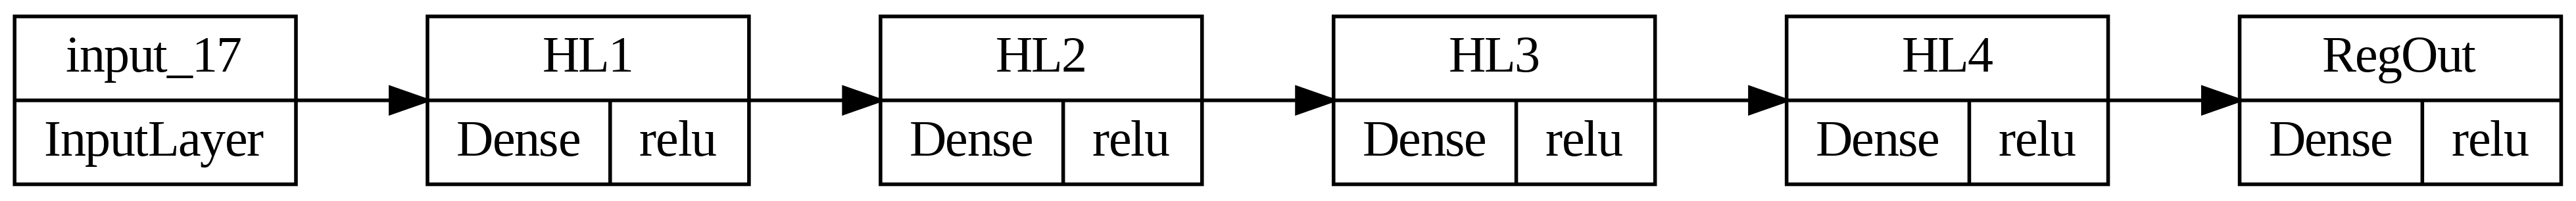

In [386]:
input_layer = Input(shape=(16,))
layer = Dense(120,activation='relu',name='HL1')(input_layer)
layer = Dense(60,activation='relu',name='HL2')(layer)
layer = Dense(40,activation='relu',name='HL3')(layer)
layer = Dense(10,activation='relu',name='HL4')(layer)
out_layer = Dense(1,activation='relu',name='RegOut')(layer)

model_single = Model(inputs=input_layer, outputs=out_layer)
model_single.compile(optimizer=keras.optimizers.AdamW(learning_rate=5e-4), loss='mse')

model_single.summary()
keras.utils.plot_model(model_single,rankdir='LR',show_shapes=False,show_layer_activations=True,dpi=400)

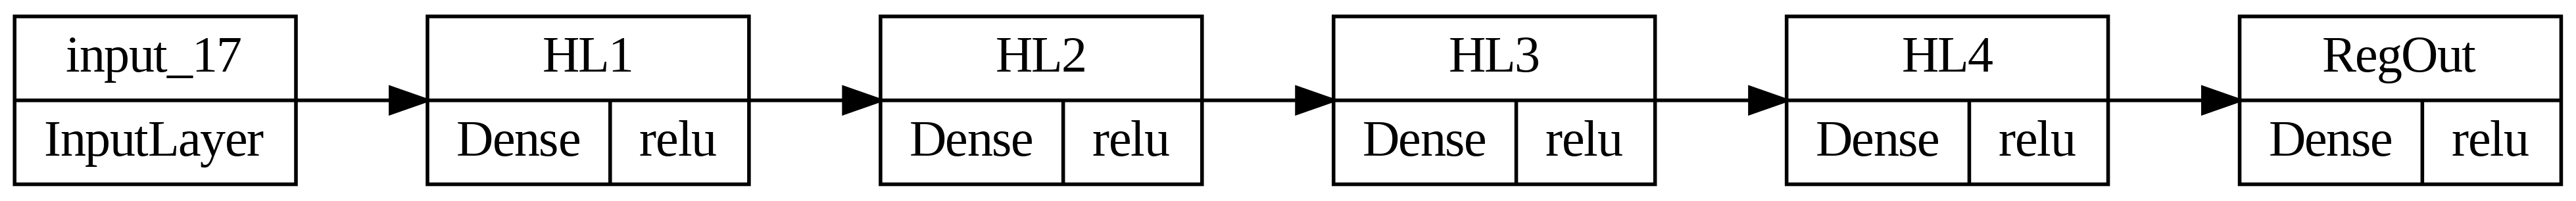

In [387]:
keras.utils.plot_model(model_single,rankdir='LR',show_shapes=False,show_layer_activations=True,dpi=400)

In [388]:
start_time = datetime.now()
history_single = model_single.fit(df_train_scaled,m_train,
                    batch_size=32,
                    verbose=1,
                    epochs=1000,
                    callbacks=[ES_train,ES_val],
                    validation_split=0.2,
                    use_multiprocessing=True)

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

Epoch 1/1000
1499/1499 [==============================] - 6s 3ms/step - loss: 132.0002 - val_loss: 52.6376
Epoch 2/1000
1499/1499 [==============================] - 4s 2ms/step - loss: 38.4547 - val_loss: 25.8648
Epoch 3/1000
1499/1499 [==============================] - 4s 2ms/step - loss: 23.8352 - val_loss: 19.2432
Epoch 4/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 17.3827 - val_loss: 17.1034
Epoch 5/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 13.7389 - val_loss: 11.5021
Epoch 6/1000
1499/1499 [==============================] - 4s 2ms/step - loss: 10.9667 - val_loss: 12.5738
Epoch 7/1000
1499/1499 [==============================] - 4s 2ms/step - loss: 9.3757 - val_loss: 11.5697
Epoch 8/1000
1499/1499 [==============================] - 5s 3ms/step - loss: 8.7940 - val_loss: 10.2397
Epoch 9/1000
1499/1499 [==============================] - 3s 2ms/step - loss: 7.6814 - val_loss: 11.4871
Epoch 10/1000
1499/1499 [=======================

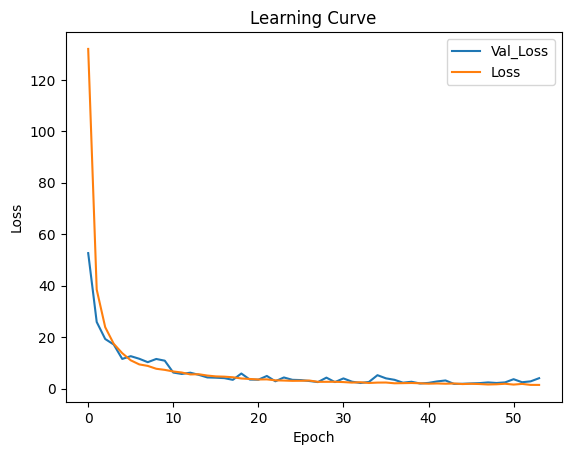

In [389]:
val_loss_values = history_single.history['val_loss']
loss_values = history_single.history['loss']

valloss_plot = plt.plot(val_loss_values, label='Val_Loss')
lossplot = plt.plot(loss_values, label="Loss")
xaxis = plt.xlabel('Epoch')
yaxis = plt.ylabel('Loss')
title = plt.title('Learning Curve')
plt.legend()
plt.show()

In [390]:
test_results_single = model_single.evaluate(df_test_scaled, m_test)
mass_results_single = model_single.predict(df_test_scaled)
rmse_single = np.sqrt(test_results_single)
print('RMSE: ',rmse_single)

1249/1249 [==============================] - 2s 1ms/step
RMSE:  1.3096537382106364


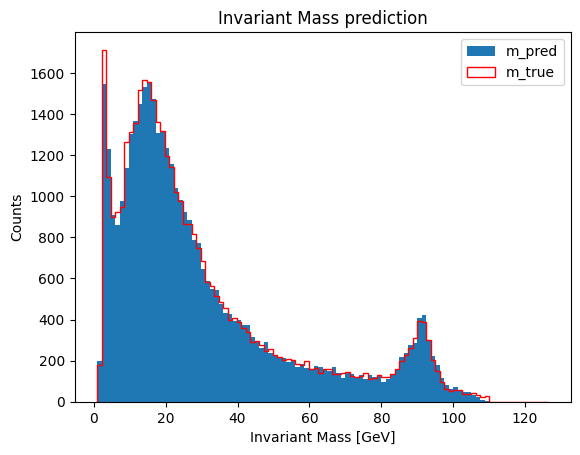

In [391]:
counts_pred, bins_pred, _ = plt.hist(mass_results_single,bins=100,label='m_pred')
counts_true, bins_true, _ = plt.hist(m_test,bins=bins_pred,histtype='step',color='red',label='m_true')
plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Counts')
plt.title('Invariant Mass prediction')
plt.legend()

plt.show()

# Hyperparameter tuning (Double)

In [ ]:
ES_train = EarlyStopping(monitor = 'loss',
                      min_delta=0.01,
                      patience=5,
                      mode='auto',
                      restore_best_weights=True)
ES_val = EarlyStopping(monitor = 'val_loss',
                        min_delta=0.01,
                        patience=5,
                        mode = 'auto',
                        restore_best_weights=True)

In [ ]:
def build_double_model(hp):
  double_node = hp.Choice('node0',[10,20,30,40])
  input1 = Input(shape=(8,),name='Input1')
  layer1 = Dense(double_node,activation='leaky_relu',name='HL01')(input1)
  input2 = Input(shape=(8,),name='Input2')
  layer2 = Dense(double_node,activation='leaky_relu',name='HL02')(input2)
  layer = concatenate([layer1,layer2],name='Concatenate')
  for i in range(hp.Choice('nlayer',[1,2,3])):
    layer = Dense(hp.Int(f'node{i+1}',min_value=10,max_value=60,step=10),activation='relu',name=f'HL{i+1}')(layer)
  output = Dense(1,activation='relu',name='Output')(layer)

  model_double = Model(inputs=[input1,input2],outputs=output)
  model_double.compile(optimizer=keras.optimizers.AdamW(learning_rate=hp.Choice('lr',[1e-4,5e-4,1e-3])),
              loss='mse')
  return model_double

build_double_model(keras_tuner.HyperParameters())

In [ ]:
tuner_double = keras_tuner.GridSearch(
    hypermodel= build_double_model,
    objective='val_loss',
    max_trials=20,
#    executions_per_trial=2,
    overwrite=True,
    directory='/content/drive/MyDrive/CorsiLM/MachineLearning/ProgettoDielectron/',
    project_name='DoubleGridHyperOpt'
)

In [ ]:
tuner_double.search_space_summary()

Search space summary
Default search space size: 4
node0 (Choice)
{'default': 10, 'conditions': [], 'values': [10, 20, 30, 40], 'ordered': True}
nlayer (Choice)
{'default': 1, 'conditions': [], 'values': [1, 2, 3], 'ordered': True}
node1 (Int)
{'default': None, 'conditions': [], 'min_value': 10, 'max_value': 60, 'step': 10, 'sampling': 'linear'}
lr (Choice)
{'default': 0.0001, 'conditions': [], 'values': [0.0001, 0.0005, 0.001], 'ordered': True}


In [ ]:
tuner_double.search([df_1,df_2],m_train,
             epochs=100,
             validation_split=0.2,
             callbacks=[ES_train,ES_val],
             batch_size=32)

Epoch 1/100
  35/1499 [..............................] - ETA: 4s - loss: 1475.1068

KeyboardInterrupt: 

In [ ]:
tuner_double.results_summary()

# Double Input Model

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 InputLayer1 (InputLayer)    [(None, 8)]                  0         []                            
                                                                                                  
 InputLayer2 (InputLayer)    [(None, 8)]                  0         []                            
                                                                                                  
 DenseLayer1 (Dense)         (None, 50)                   450       ['InputLayer1[0][0]']         
                                                                                                  
 DenseLayer2 (Dense)         (None, 50)                   450       ['InputLayer2[0][0]']         
                                                                                            

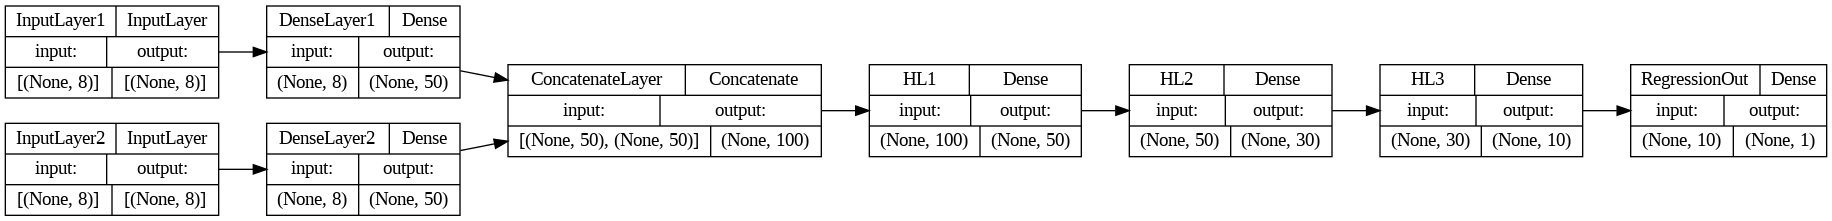

In [ ]:
input_layer1 = Input(shape=(8,),name='InputLayer1')
layer1 = Dense(65,activation="leaky_relu",name='DenseLayer1')(input_layer1)
input_layer2 = Input(shape=(8,),name='InputLayer2')
layer2 = Dense(65,activation='leaky_relu',name='DenseLayer2')(input_layer2)
layer = concatenate([layer1,layer2],name="ConcatenateLayer")
layer = Dense(50,activation='relu',name='HL1')(layer)
layer = Dense(30,activation='relu',name='HL2')(layer)
layer = Dense(20,activation='relu',name='HL3')(layer)
regression_out = Dense(1, activation='relu', name='RegressionOut')(layer)

model_double = Model(inputs=[input_layer1,input_layer2], outputs=regression_out)

model_double.compile(optimizer=keras.optimizers.AdamW(learning_rate=5e-4),
              loss='mse')

ES_train = EarlyStopping(monitor='loss',
                         min_delta=0.001,
                         patience=10,
                         restore_best_weights=True)
ES_val = EarlyStopping(monitor='val_loss',
                       min_delta=0.001,
                       patience=10,
                       restore_best_weights=True)

model_double.summary()
keras.utils.plot_model(model_double,rankdir='LR',show_shapes=True)

In [ ]:
start_time = datetime.now()
df_1 = df_train_scaled.iloc[:,:8]
df_2 = df_train_scaled.iloc[:,8:16]
history = model_double.fit([df_1,df_2],m_train,
                    batch_size=32,
                    verbose=1,
                    epochs=1000,
                    callbacks=[ES_train,ES_val],
                    validation_split=0.2)

end_time = datetime.now()
print('Duration: {}'.format(end_time-start_time))

Epoch 1/1000
1499/1499 [==============================] - 6s 3ms/step - loss: 547.7365 - val_loss: 383.5385
Epoch 2/1000
1499/1499 [==============================] - 5s 3ms/step - loss: 335.8571 - val_loss: 201.5679
Epoch 3/1000
1499/1499 [==============================] - 4s 3ms/step - loss: 86.1675 - val_loss: 58.4258
Epoch 4/1000
1499/1499 [==============================] - 7s 4ms/step - loss: 47.7337 - val_loss: 41.0398
Epoch 5/1000
1499/1499 [==============================] - 9s 6ms/step - loss: 37.9056 - val_loss: 34.3335
Epoch 6/1000
1499/1499 [==============================] - 10s 6ms/step - loss: 33.0289 - val_loss: 30.7178
Epoch 7/1000
1499/1499 [==============================] - 5s 3ms/step - loss: 29.6546 - val_loss: 30.0892
Epoch 8/1000
1499/1499 [==============================] - 8s 5ms/step - loss: 27.3764 - val_loss: 30.5616
Epoch 9/1000
1499/1499 [==============================] - 5s 4ms/step - loss: 25.1634 - val_loss: 22.8968
Epoch 10/1000
1499/1499 [================

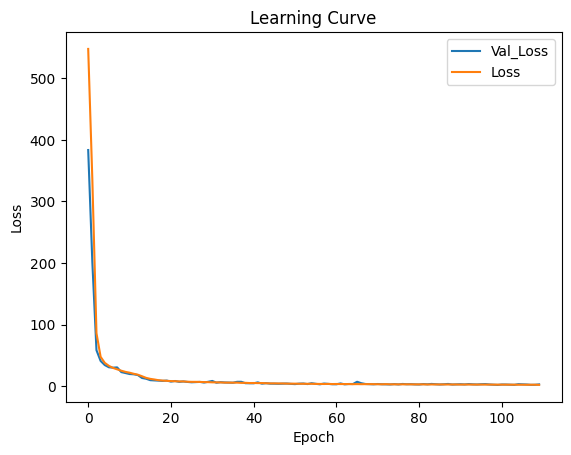

In [ ]:
val_loss_values = history.history['val_loss']
loss_values = history.history['loss']

valloss_plot = plt.plot(val_loss_values, label='Val_Loss')
lossplot = plt.plot(loss_values, label="Loss")
xaxis = plt.xlabel('Epoch')
yaxis = plt.ylabel('Loss')
title = plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
df_test_1 = df_test_scaled.iloc[:,:8]
df_test_2 = df_test_scaled.iloc[:,8:16]
test_results_double = model_double.evaluate([df_test_1,df_test_2], m_test)
mass_results_double = model_double.predict([df_test_1,df_test_2])
rmse = np.sqrt(test_results_double)
print('RMSE: ',rmse)

1249/1249 [==============================] - 2s 2ms/step
RMSE:  1.4930059774679012


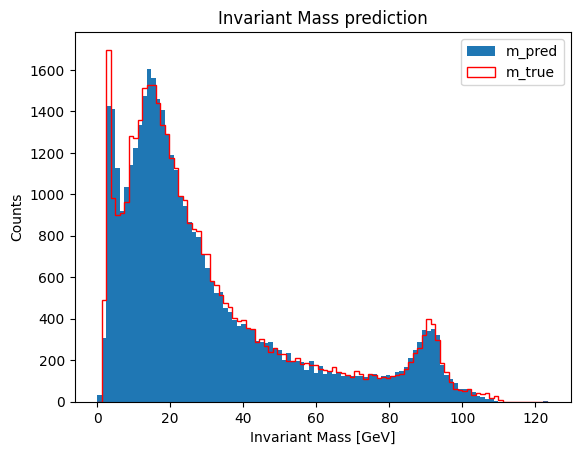

In [ ]:
counts_pred, bins_pred, _ = plt.hist(mass_results_double,bins=100,label='m_pred')
counts_true, bins_true, _ = plt.hist(m_test,bins=bins_pred,histtype='step',label='m_true',color='red')

plt.xlabel('Invariant Mass [GeV]')
plt.ylabel('Counts')
plt.title('Invariant Mass prediction')
plt.legend()

plt.show()

# Final Results

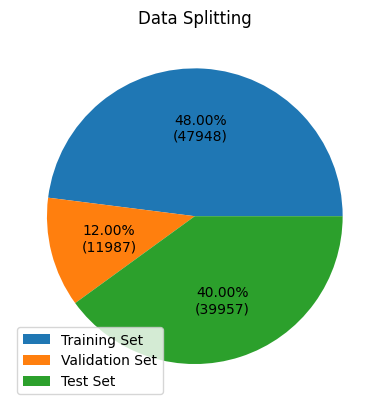

In [ ]:
# Data separation
train_size = len(df_train.index)*0.8
valid_size = len(df_train.index)*0.2
test_size = len(df_test.index)
values = [train_size,valid_size,test_size]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%\n({v:d})'.format(p=pct,v=val)
    return my_autopct

pie = plt.pie(values,autopct=make_autopct(values))
plt.legend(labels=['Training Set','Validation Set','Test Set'],loc='lower left')
plt.title('Data Splitting')
plt.show()

NameError: name 'mass_results_single' is not defined

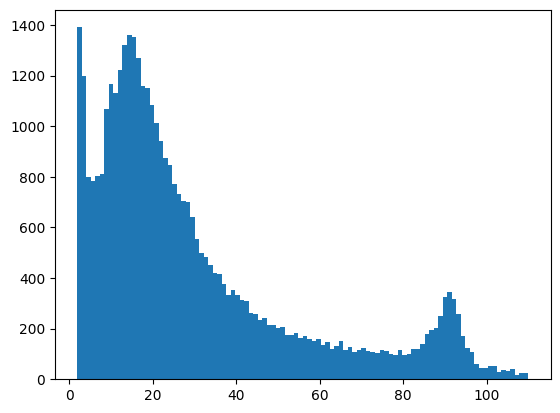

In [ ]:
# Final masses
m_true_bins, bin_true, _ = plt.hist(m_test,bins=100,label='m_true',histtype='bar')
m_single, bins_single, _ = plt.hist(mass_results_single,bins=bin_true,histtype='step',label='m_single')
m_double, bins_double, _ = plt.hist(mass_results_double,bins=bin_true,histtype='step',label='m_double')
plt.xlim(left=2,right=110)
plt.xlabel('$M_{inv}$ [GeV]')
plt.ylabel('Counts')
plt.title('Invariant Mass prediction')
plt.legend()

plt.show()

In [ ]:
def gaussian(x, a, mean, sigma):
    return a * np.exp(-((x - mean)**2 / (2 * sigma**2)))

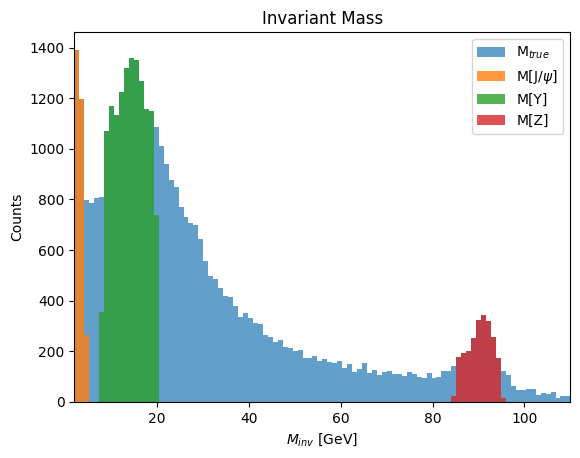

In [ ]:
yhist, xhist, _ = plt.hist(m_test,bins=100,label='M$_{true}$',histtype='bar',alpha=0.7)
mJ = []
mY = []
mZ = []
for m in m_test:
  if m<4.5:
    mJ.append(m)
  elif m>8 and m<20:
    mY.append(m)
  elif m>85 and m<95:
    mZ.append(m)

plt.hist(mJ,bins=xhist,label='M[J/$\psi$]',alpha=0.8)
plt.hist(mY,bins=xhist,label='M[Y]',alpha=0.8)
plt.hist(mZ,bins=xhist,label='M[Z]',alpha=0.8)
plt.xlim(2,110)
plt.xlabel('$M_{inv}$ [GeV]')
plt.ylabel('Counts')
plt.title('Invariant Mass')
plt.legend()

plt.show()